<a href="https://colab.research.google.com/github/rishabhshah13/Adversarial_Patch_XAI590/blob/main/Assignment%206/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6 - Explainable Technique


##Rishabh Shah

In [26]:
# pip install seaborn pandas alibi

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from alibi.explainers import ALE, plot_ale


In [28]:
# Load dataset (e.g., Titanic dataset)
titanic = sns.load_dataset('titanic').dropna()

# Prepare data: Select numerical features and target
X = titanic.drop('survived', axis=1).select_dtypes(include='number')
y = titanic['survived']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

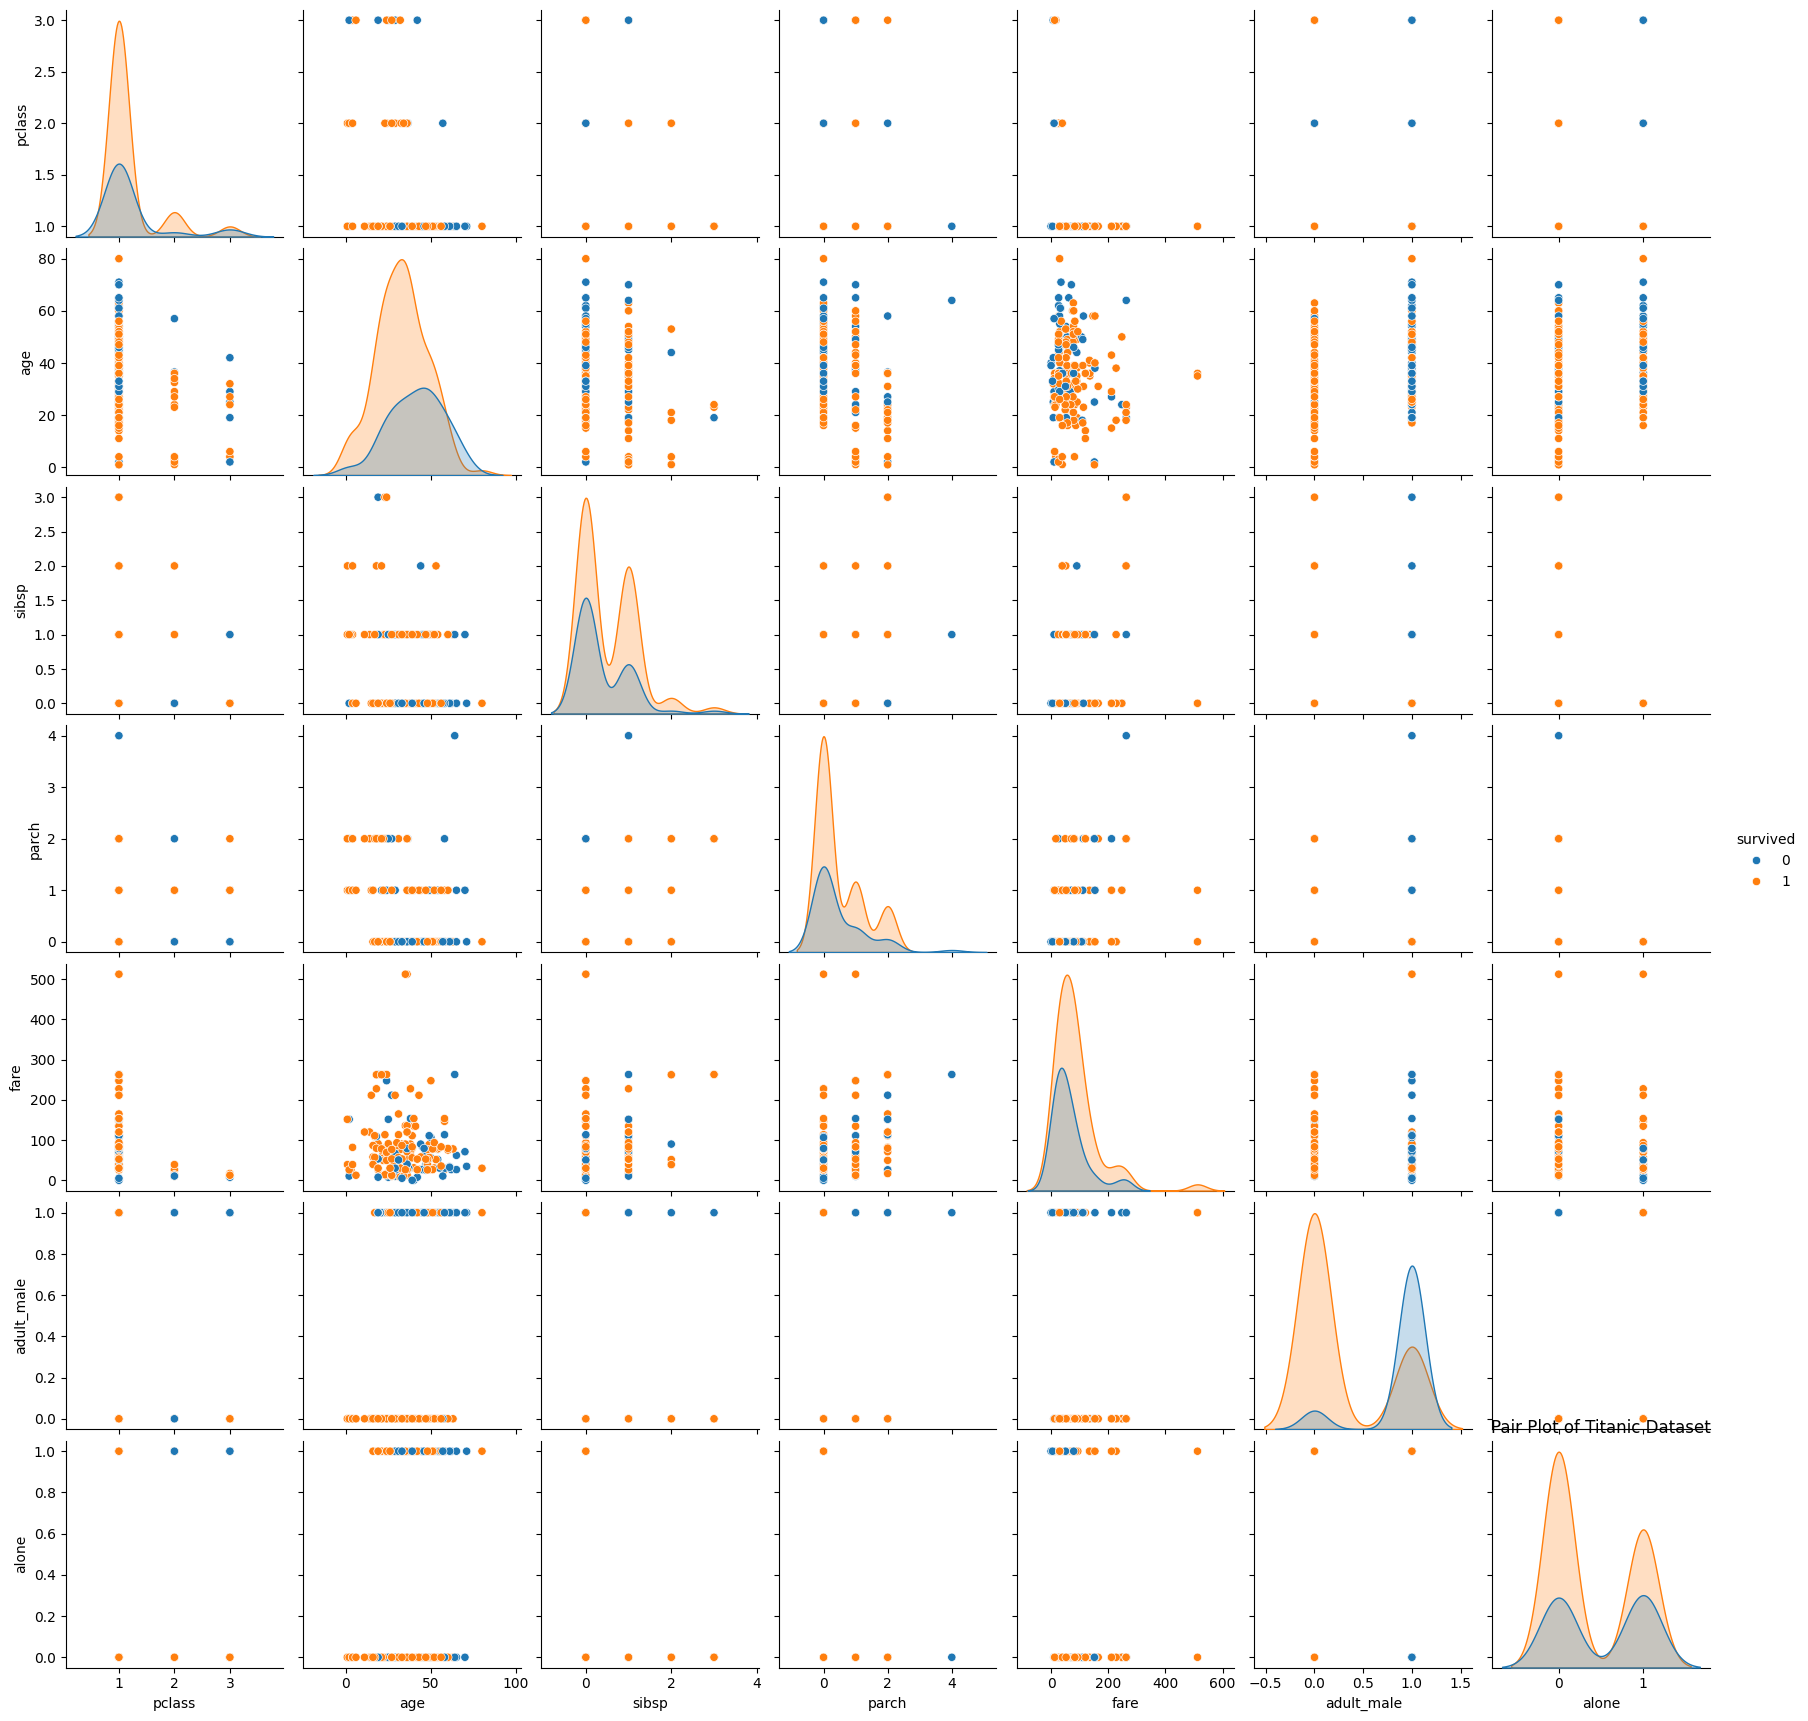

In [32]:
# Plot pairplot to visualize relationships between features
sns.pairplot(titanic, hue='survived')
plt.title('Pair Plot of Titanic Dataset')
plt.show()

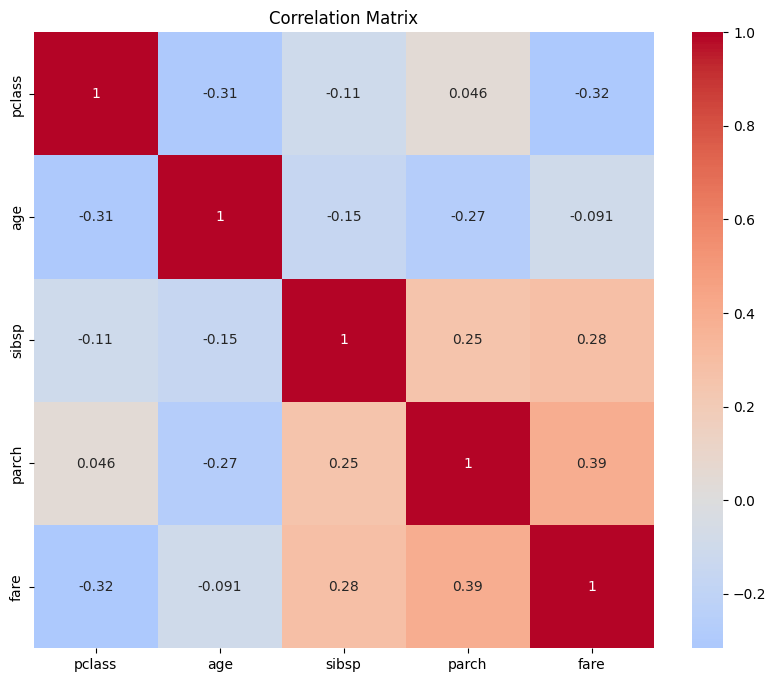

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Partial Dependence Plot (PDP)

* Pclass: The partial dependence shows a slight increase in survival probability
as the passenger class decreases (lower class number).
* Age: Younger passengers have a higher survival probability, which decreases with age, showing some fluctuations.
* SibSp: The number of siblings/spouses aboard shows a minor negative impact on survival probability.
* Parch: As the number of parents/children aboard increases, the survival probability slightly decreases.
* Fare: Higher fares are associated with increased survival probability, leveling off at higher fare values.

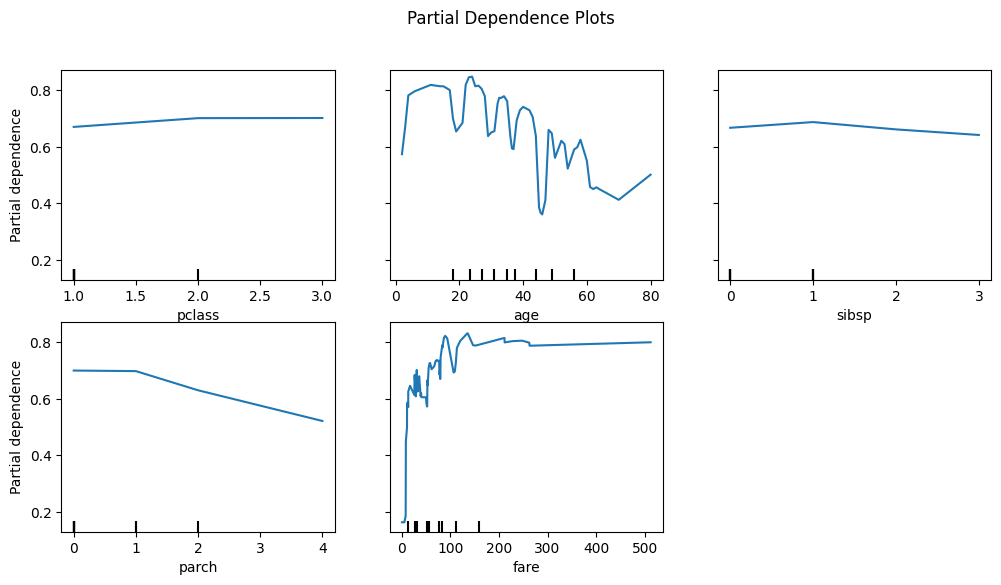

In [19]:
# features = ['fare', 'age']
features = ['pclass',	'age',	'sibsp',	'parch',	'fare']
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.show()

# Individual Conditional Expectation (ICE)


* Pclass: Individual lines show variability in survival probability across different classes, with a general trend of higher survival in first class.
* Age: Displays diverse individual responses, with younger ages generally showing higher survival probabilities.
* SibSp: Individual effects vary slightly, indicating minor influence on survival.
* Parch: Shows variability among individuals, with a general decrease in survival probability as the number increases.
* Fare: Individual responses indicate that higher fares generally lead to better survival chances, but with some variability.

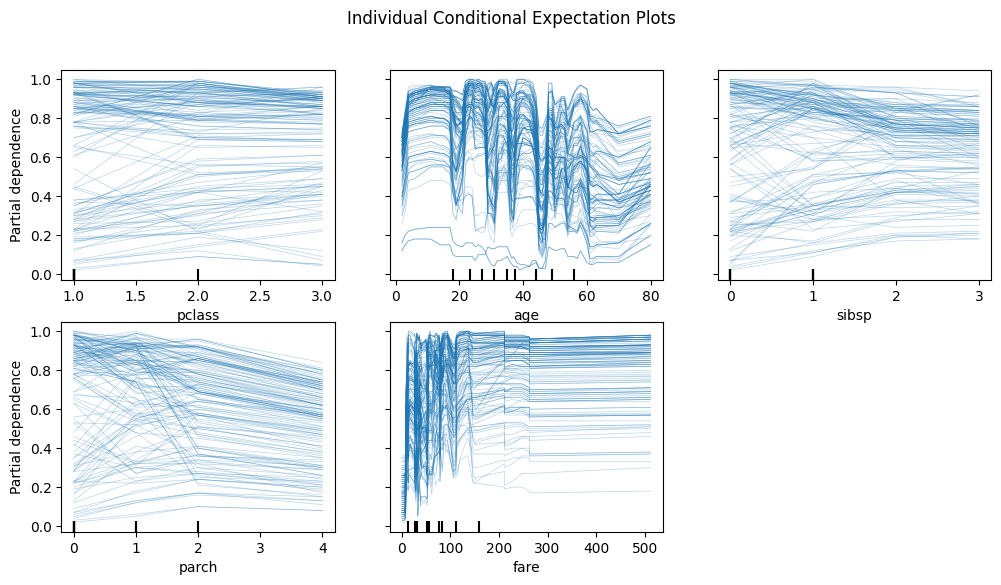

In [20]:

fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, X_train, features, kind='individual', ax=ax)
plt.suptitle('Individual Conditional Expectation Plots')
plt.show()

# Accumulated Local Effects (ALE)

* Pclass: Minimal effect on survival across different classes.
* Age: Shows varied effects, with some age ranges having positive or negative impacts on survival.
* SibSp: Slight negative impact on survival probability as the number increases.
* Parch: Displays opposing effects for different classes; more parents/children can reduce survival chances.
* Fare: Higher fares generally have a positive effect on survival, though this varies between classes.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

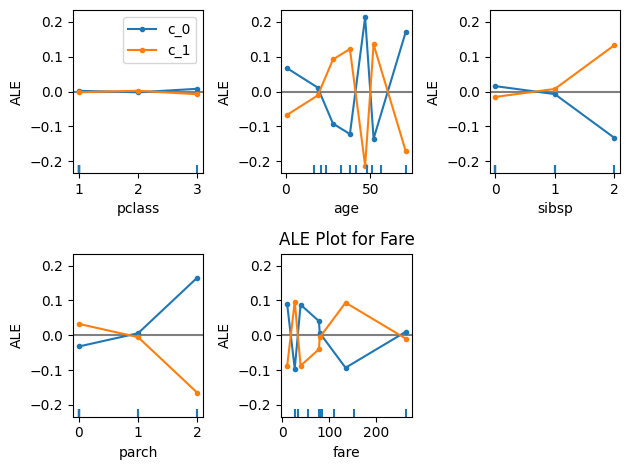

In [23]:
ale_explainer = ALE(model.predict_proba, feature_names=X_train.columns)
ale_exp = ale_explainer.explain(X_test.values)

# Plot ALE for 'fare'
plot_ale(ale_exp, features=features)
plt.title('ALE Plot for Fare')
plt.show()

PDP vs. ALE Differences: PDP assumes feature independence, which can be misleading if features are correlated. ALE accounts for interactions, providing more accurate insights when correlations exist.


Correlation Impact: The correlation matrix helps identify potential multicollinearity issues. For instance, the strong correlation between fare and pclass suggests careful interpretation of their individual effects. This can affect model predictions and feature importance interpretations.